In [1]:
#!/usr/bin/env python3
import sys
sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/code/')
from main import *
from parameters import *
import matplotlib
import matplotlib.pyplot as plt

increment = 0.1
time = 20000
agents = 3

wealth_coordinates = [0, 1, 0]

atclog = []
strat = []
stratf = []
atc = []

while wealth_coordinates[2] <= (1-wealth_coordinates[0]- 0.01):
    print(wealth_coordinates)
    df = main("static", time, 0, agents, 0, wealth_coordinates, tqdm_display = False, reset_wealth = True)
    df['PReturns'] = np.log1p(df['Price'].pct_change())


    atclog.append(df['PReturns'].autocorr(lag=1))
    print(df['PReturns'].autocorr(lag=1))
    atc.append((df['Price'].pct_change()).autocorr(lag=1))
    strat.append(wealth_coordinates[1])
    stratf.append(wealth_coordinates[2])


    wealth_coordinates[1] -= increment
    wealth_coordinates[2] += increment





[0, 1, 0]


  0%|          | 0/20000 [00:00<?, ?it/s]/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:129: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:131: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
100%|██████████| 20000/20000 [00:07<00:00, 2655.98it/s]


0.06306437803037546
[0, 0.9, 0.1]


100%|██████████| 20000/20000 [00:07<00:00, 2842.21it/s]


0.14125533655345845
[0, 0.8, 0.2]


100%|██████████| 20000/20000 [00:06<00:00, 2879.66it/s]


0.2829794179299692
[0, 0.7000000000000001, 0.30000000000000004]


 40%|███▉      | 7993/20000 [00:02<00:04, 2733.10it/s]/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:723: RuntimeWarning: invalid value encountered in log
  ind.DailyReturn = np.log(ind.wealth / ind.prev_wealth)
100%|██████████| 20000/20000 [00:07<00:00, 2659.56it/s]


0.7536566953018699
[0, 0.6000000000000001, 0.4]


 14%|█▍        | 2866/20000 [00:01<00:06, 2491.77it/s]/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:153: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * ind.wealth / p) * np.tanh(SCALE_NT * (math.log2(ind[0] * ind.process) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:136: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
100%|██████████| 20000/20000 [00:07<00:00, 2542.42it/s]


0.5155025190147994
[0, 0.5000000000000001, 0.5]


100%|██████████| 20000/20000 [00:08<00:00, 2493.75it/s]


0.2614244009436234
[0, 0.40000000000000013, 0.6]


100%|██████████| 20000/20000 [00:08<00:00, 2373.62it/s]


0.24215392005417122
[0, 0.30000000000000016, 0.7]


100%|██████████| 20000/20000 [00:09<00:00, 2113.52it/s]


0.26651571103424126
[0, 0.20000000000000015, 0.7999999999999999]


100%|██████████| 20000/20000 [00:09<00:00, 2193.98it/s]


0.3012363117395583
[0, 0.10000000000000014, 0.8999999999999999]


100%|██████████| 20000/20000 [00:08<00:00, 2302.38it/s]

nan


In [2]:
print(df['Price'])
df['PriceReturns'] = df['Price'].pct_change()
print(df['PriceReturns'])

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
19974    100.0
19975    100.0
19976    100.0
19977    100.0
19978    100.0
Name: Price, Length: 19979, dtype: float64
0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19974    0.0
19975    0.0
19976    0.0
19977    0.0
19978    0.0
Name: PriceReturns, Length: 19979, dtype: float64


ATC of returns is equal to ATC of log returns


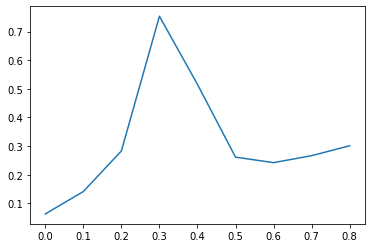

Y: one time step autocorrelation of log price returns
X: Share of TFs


In [4]:
# print(atclog, atc)
print('ATC of returns is equal to ATC of log returns')


plt.plot(stratf, atclog)
plt.show()
print('Y: one time step autocorrelation of log price returns')
print('X: Share of TFs')

# plt.plot(stratf, atc)
# plt.show()
# print('Y: one time step autocorrelation of price returns')
# print('X: Share of TFs')
